In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
%matplotlib inline
import os
import re

# Data Pre-Processing
- Getting rid of unwanted data
- Checking up if the data is normalized or not
- Filtering Headlines
- Defining max features
- Vectorize & Convert text for input
- Splitting data to train & test

In [ ]:
df = pd.read_json('/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json', lines=True)
df.head()


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


- ### Getting rid of unwanted data

In [ ]:
df = df[['headline','is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


- ### Checking for normalization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

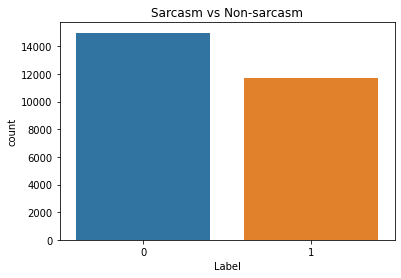

In [ ]:
sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')


- ### Filtering headlines 
- So that only valid headlines remain & 

In [ ]:
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


- ### Defining Max features 
- ### using Tokenizer to vectorize and convert text into Sequences 
 so that the Network can deal with it as input

In [ ]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)
X = pad_sequences(X)

### Splitting data to train & test

In [ ]:
Y = pd.get_dummies(df['is_sarcastic']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(17895, 29) (17895, 2)
(8814, 29) (8814, 2)


# Defining the LSTM RNN Model
With softmax activation

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

#### Training the model

In [ ]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)

Epoch 1/25
560/560 - 82s - loss: 0.4433 - accuracy: 0.7838 - 82s/epoch - 146ms/step
Epoch 2/25
560/560 - 80s - loss: 0.3333 - accuracy: 0.8545 - 80s/epoch - 142ms/step
Epoch 3/25
560/560 - 79s - loss: 0.2999 - accuracy: 0.8706 - 79s/epoch - 142ms/step
Epoch 4/25
560/560 - 79s - loss: 0.2696 - accuracy: 0.8859 - 79s/epoch - 141ms/step
Epoch 5/25
560/560 - 79s - loss: 0.2498 - accuracy: 0.8946 - 79s/epoch - 141ms/step
Epoch 6/25
560/560 - 79s - loss: 0.2324 - accuracy: 0.9025 - 79s/epoch - 141ms/step
Epoch 7/25
560/560 - 79s - loss: 0.2134 - accuracy: 0.9093 - 79s/epoch - 141ms/step
Epoch 8/25
560/560 - 79s - loss: 0.1923 - accuracy: 0.9202 - 79s/epoch - 141ms/step
Epoch 9/25
560/560 - 79s - loss: 0.1798 - accuracy: 0.9270 - 79s/epoch - 141ms/step
Epoch 10/25
560/560 - 79s - loss: 0.1643 - accuracy: 0.9320 - 79s/epoch - 142ms/step
Epoch 11/25
560/560 - 79s - loss: 0.1499 - accuracy: 0.9377 - 79s/epoch - 141ms/step
Epoch 12/25
560/560 - 79s - loss: 0.1399 - accuracy: 0.9451 - 79s/epoch - 

Let's check the accuracy and score now

In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

229/229 - 4s - loss: 0.9788 - accuracy: 0.8161 - 4s/epoch - 20ms/step
score: 0.98
acc: 0.82


#### Let's check it's score on sarcastic & non-sarcastic headlines respectively

In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("Sarcasm_acc", pos_correct/pos_cnt*100, "%")
print("Non-Sarcasm_acc", neg_correct/neg_cnt*100, "%")

Let's try it on a popular headline

In [ ]:
headline = ['Chowkidar hi chor hai']
headline = tokenizer.texts_to_sequences(headline)
headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Non-sarcastic")
elif (np.argmax(sentiment) == 1):
    print("Sarcasm")

1/1 - 0s - 25ms/epoch - 25ms/step
Sarcasm
